In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
import socket
import pickle
from tqdm import tqdm
import cv2

from io import BytesIO

In [9]:
this_computer_name = socket.gethostname()
print(this_computer_name)

DESKTOP-F5LCT4Q


In [10]:

if this_computer_name == 'DESKTOP-V3D343U':
    freemocap_validation_data_path = Path(r"I:\My Drive\HuMoN_Research_Lab\FreeMoCap_Stuff\FreeMoCap_Balance_Validation\data")
elif this_computer_name == 'DESKTOP-F5LCT4Q':
    freemocap_validation_data_path = Path(r"C:\Users\aaron\Documents\HumonLab\Spring2022\ValidationStudy\FreeMocap_Data")
else:
    freemocap_validation_data_path = Path(r"C:\Users\kiley\Documents\HumonLab\SampleFMC_Data\FreeMocap_Data-20220216T173514Z-001\FreeMocap_Data")

In [11]:
sessionID = 'session_SER_1_20_22' #name of the sessionID folder
this_freemocap_session_path = freemocap_validation_data_path / sessionID
this_freemocap_data_path = this_freemocap_session_path/'DataArrays'

totalCOM_data_path = this_freemocap_data_path / 'totalBodyCOM_frame_XYZ.npy'
segmentedCOM_data_path = this_freemocap_data_path / 'segmentedCOM_frame_joint_XYZ.npy'
mediapipe_data_path = this_freemocap_data_path/'mediaPipeSkel_3d_smoothed.npy'
mediapipeSkeleton_file_name = this_freemocap_data_path/'mediapipeSkelcoordinates_frame_segment_joint_XYZ.pkl'



In [12]:

totalCOM_frame_XYZ = np.load(totalCOM_data_path) #loads in the data as a numpy array

segmentedCOM_frame_joint_XYZ = np.load(segmentedCOM_data_path)

mediapipeSkel_fr_mar_dim = np.load(mediapipe_data_path) #loads in the data as a numpy array

open_file = open(mediapipeSkeleton_file_name, "rb")
mediapipeSkelcoordinates_frame_segment_joint_XYZ = pickle.load(open_file)
open_file.close()




f=2

In [13]:
num_pose_joints = 33 #number of pose joints tracked by mediapipe 




pose_joint_range = range(num_pose_joints)
#frame_range = range(first_frame,last_frame)

mediapipe_pose_data = mediapipeSkel_fr_mar_dim[:,0:num_pose_joints,:] #load just the pose joints into a data array, removing hands and face data 

num_frames = len(mediapipe_pose_data)

num_frame_range = range(num_frames)

skel_x = mediapipe_pose_data[:,:,0]
skel_y = mediapipe_pose_data[:,:,1]
skel_z = mediapipe_pose_data[:,:,2]

In [28]:
from matplotlib.animation import FuncAnimation

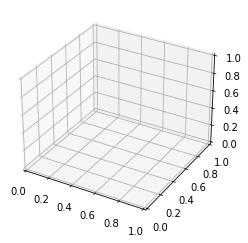

In [31]:


figure = plt.figure()

ax = figure.add_subplot(111, projection = '3d')

def animate(frame):
    
    goodframe_x = skel_x[frame,:]
    goodframe_y = skel_y[frame,:]
    goodframe_z = skel_z[frame,:]


    ax.clear()
    ax.scatter(goodframe_x, goodframe_y,goodframe_z)

ani = FuncAnimation(figure, animate, frames=20, interval=500, repeat=False)
plt.show()


In [36]:
x = []
y = []
fig, ax = plt.subplots()
%matplotlib qt
s
def animate(i):
    pt = 3 # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])

anim = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)
plt.show()

ImportError: Failed to import any qt binding

  0%|          | 0/1 [00:00<?, ?it/s]


TypeError: descriptor 'write' for '_io.BytesIO' objects doesn't apply to a 'memoryview' object

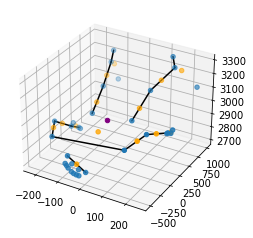

In [23]:
frame = 14000

frames_for_video_list = []

for frame in tqdm([1]):
    buffer = BytesIO

    goodframe_x = skel_x[frame,:]
    goodframe_y = skel_y[frame,:]
    goodframe_z = skel_z[frame,:]

    segment_COM_x = segmentedCOM_frame_joint_XYZ[frame,:,0]
    segment_COM_y = segmentedCOM_frame_joint_XYZ[frame,:,1]
    segment_COM_z = segmentedCOM_frame_joint_XYZ[frame,:,2]

    total_COM_x = totalCOM_frame_XYZ[frame,0]
    total_COM_y = totalCOM_frame_XYZ[frame,1]
    total_COM_z = totalCOM_frame_XYZ[frame,2]

    plot_frame_bones_XYZ = mediapipeSkelcoordinates_frame_segment_joint_XYZ[frame]
    

    figure = plt.figure()

    ax = figure.add_subplot(111, projection = '3d')

    ax.scatter(goodframe_x, goodframe_y,goodframe_z)

    for segment in plot_frame_bones_XYZ.keys():
        prox_joint = plot_frame_bones_XYZ[segment][0] 
        dist_joint = plot_frame_bones_XYZ[segment][1]
        
        bone_x,bone_y,bone_z = [prox_joint[0],dist_joint[0]],[prox_joint[1],dist_joint[1]],[prox_joint[2],dist_joint[2]] 

        ax.plot(bone_x,bone_y,bone_z,color = 'black')
    
    ax.scatter(segment_COM_x,segment_COM_y,segment_COM_z, color = 'orange')    

    ax.scatter(total_COM_x,total_COM_y,total_COM_z, color = 'purple')



    #cv2.cvtColor(np.asarray(figure.canvas.buffer_rgba()), cv2.COLOR_RGBA2BGR)

    #graph_image = np.array(figure.canvas.get_renderer()._renderer)

    #frames_for_video_list.append(figure)

    #graph_image = cv2.cvtColor(graph_image,cv2.COLOR_RGB2BGR)
    
    #cv2.imshow('title',graph_image)
    plt.savefig(buffer, format = 'raw')    
    plt.close(figure)
    plt.ioff() 

f = 2

In [11]:
plt.close('all')

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [20]:
img = [] # some array of images
frames = [] # for storing the generated images



for frame in range(1):
    fig = plt.figure()

    ax = figure.add_subplot(111, projection = '3d')

    ax.scatter(goodframe_x, goodframe_y,goodframe_z)
    frames.append([plt.imshow(img[frame], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [8]:
plot_this_frame = good_frame


plot_frame_bones_XYZ = mediapipeSkelcoordinates_frame_segment_joint_XYZ[plot_this_frame]

%matplotlib
plt.ion
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')

ax.scatter(goodframe_x, goodframe_y,goodframe_z)

#bonez
for segment in plot_frame_bones_XYZ.keys():
    prox_joint = plot_frame_bones_XYZ[segment][0] 
    dist_joint = plot_frame_bones_XYZ[segment][1]
    
    bone_x,bone_y,bone_z = [prox_joint[0],dist_joint[0]],[prox_joint[1],dist_joint[1]],[prox_joint[2],dist_joint[2]] 

    ax.plot(bone_x,bone_y,bone_z,color = 'black')
    
ax.scatter(segment_COM_x,segment_COM_y,segment_COM_z, color = 'orange')    

ax.scatter(total_COM_x,total_COM_y,total_COM_z, color = 'purple')
plt.show()

f = 2

NameError: name 'good_frame' is not defined